In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

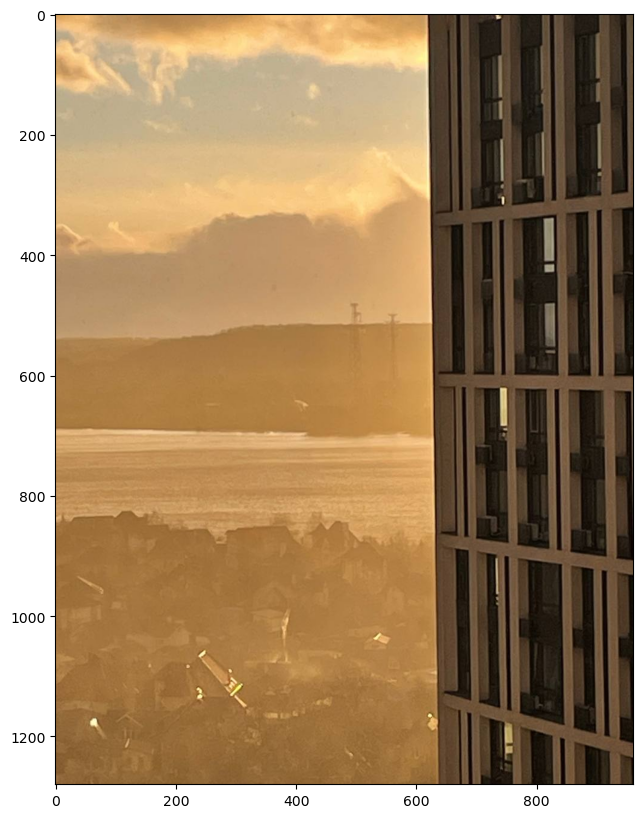

In [9]:
img = cv2.imread('014.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: title={'center': 'Noisy'}>,
 Text(0.5, 1.0, 'Noisy'))

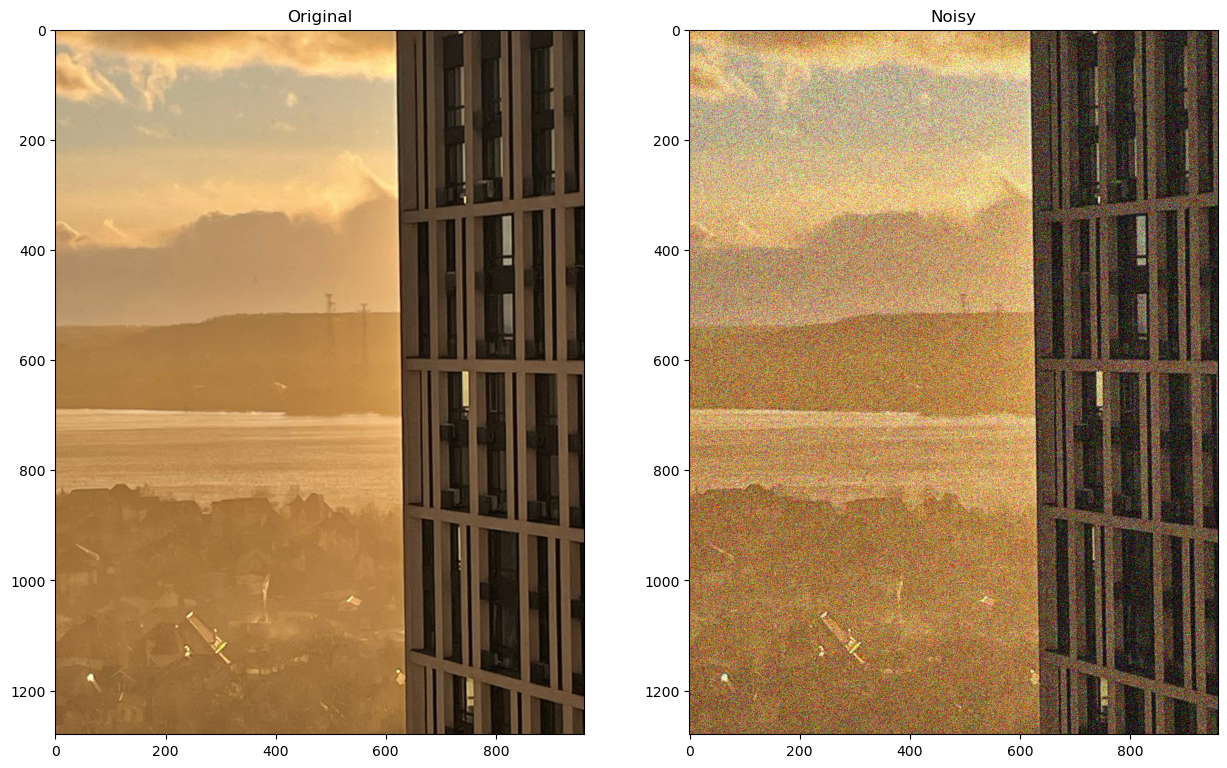

In [14]:
noisy = img/255 + 0.2*np.random.randn(*img.shape)
noisy[noisy < 0] = 0
noisy[noisy > 1] = 1
noisy = (255*noisy).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(noisy), plt.title('Noisy')

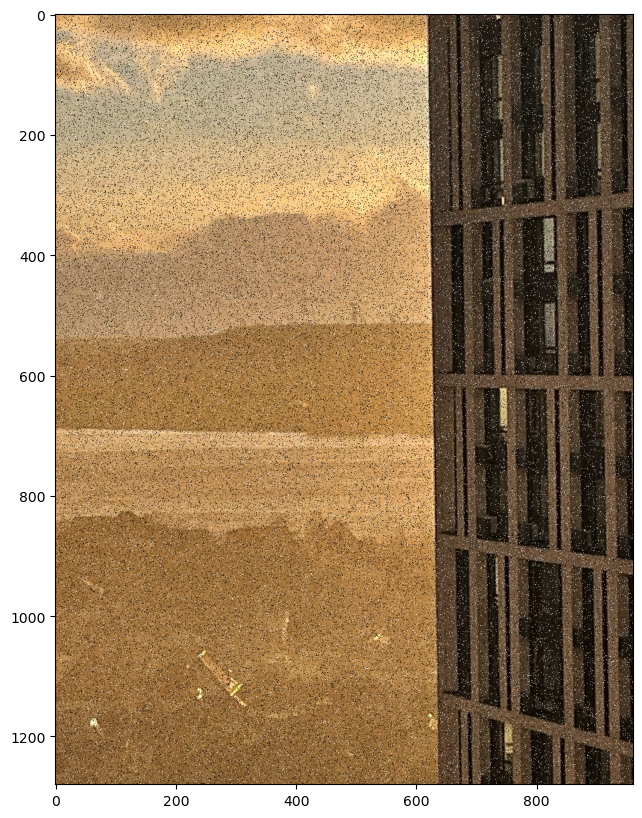

In [24]:
noisy = np.zeros_like(img)
rows, cols, _ = img.shape

probability = 0.1
for r in range(rows):
    for c in range(cols):
        if np.random.rand() < probability:
            # 50% chance of getting salt or pepper
            if np.random.rand() < 0.3:
                noisy[r, c, :] = 255
            else:
                noisy[r, c, :] = 0.5
        else:
            noisy[r, c, :] = img[r, c, :]
            
plt.imshow(noisy)

(<Axes: title={'center': 'Out'}>,
 Text(0.5, 1.0, 'Out'))

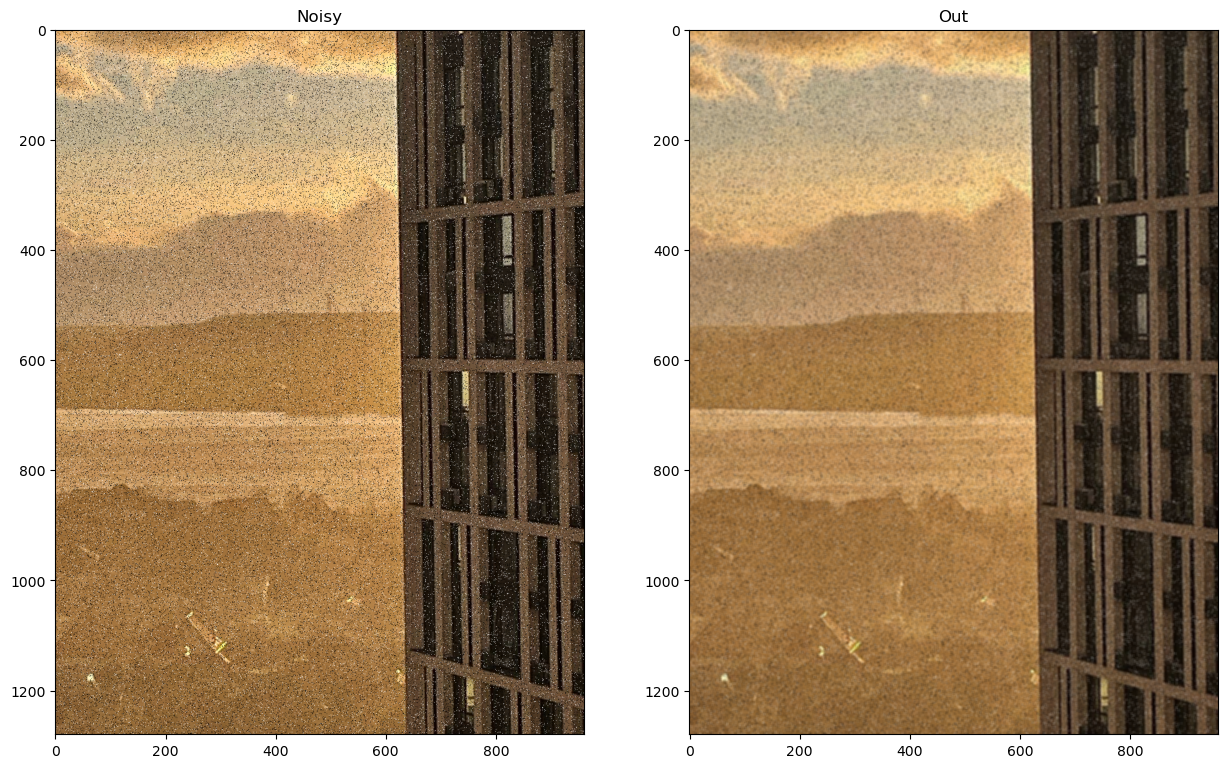

In [35]:
out = cv2.GaussianBlur(noisy, ksize=(5,5), sigmaX=8)
plt.subplot(121), plt.imshow(noisy), plt.title('Noisy')
plt.subplot(122), plt.imshow(out), plt.title('Out')

(<Axes: title={'center': 'Out'}>,
 Text(0.5, 1.0, 'Out'))

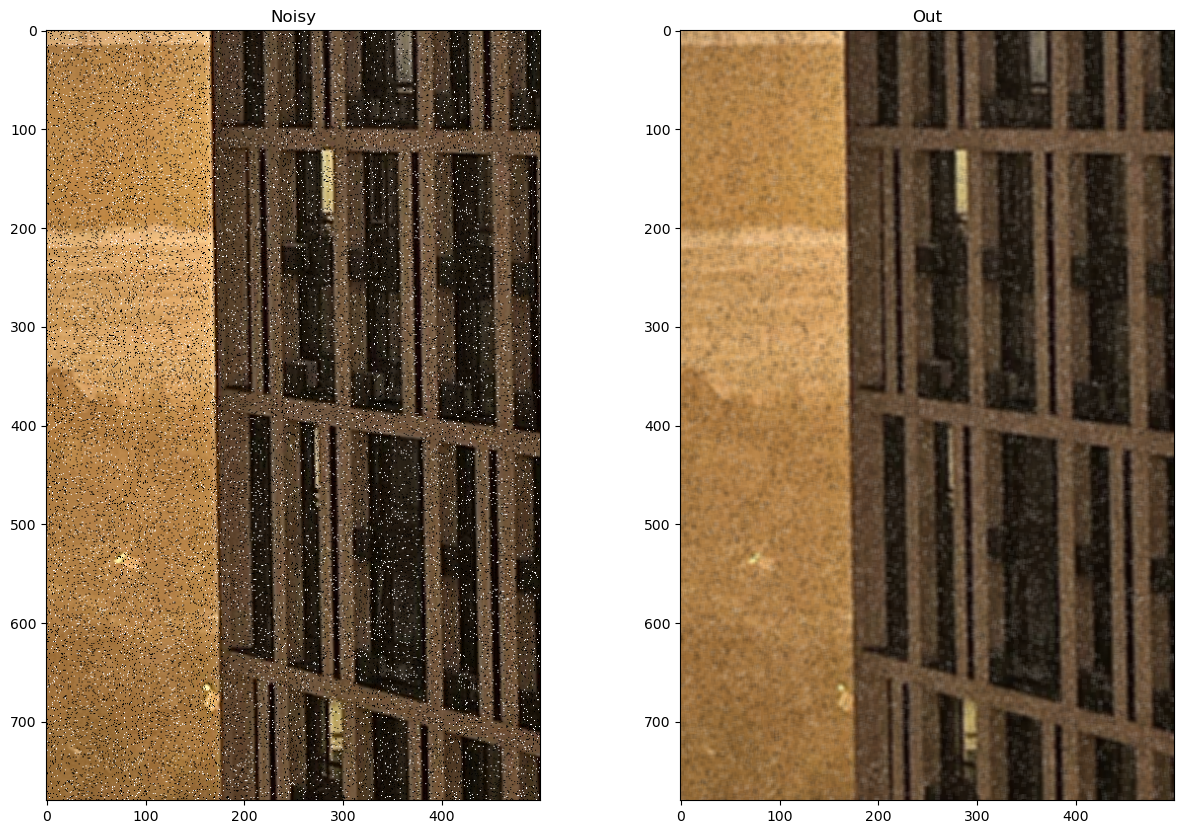

In [42]:
plt.subplot(121), plt.imshow(noisy[500:, -500:, :]), plt.title('Noisy')
plt.subplot(122), plt.imshow(out[500:, -500:, :]), plt.title('Out')

(<Axes: title={'center': 'Median'}>,
 Text(0.5, 1.0, 'Median'))

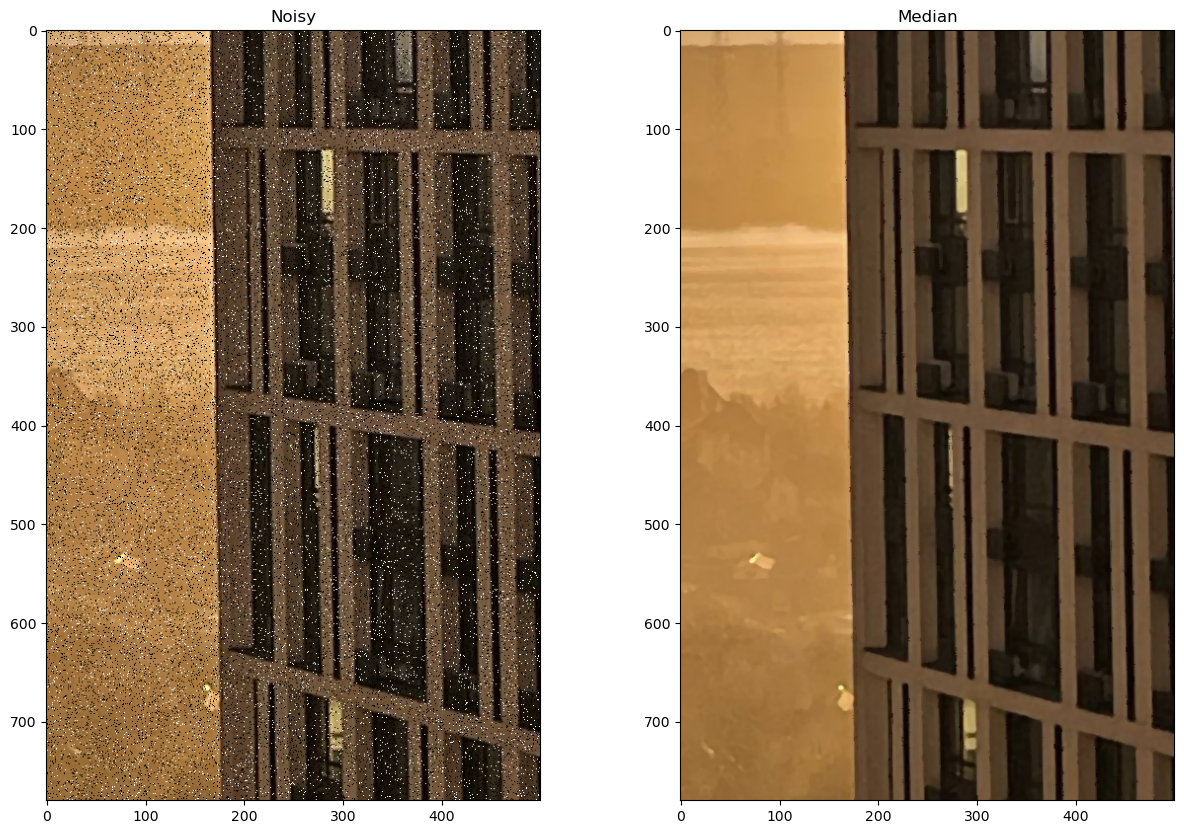

In [46]:
median = cv2.medianBlur(noisy, ksize=5)
plt.subplot(121), plt.imshow(noisy[500:, -500:, :]), plt.title('Noisy')
plt.subplot(122), plt.imshow(median[500:, -500:, :]), plt.title('Median')